In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Categories=['Cars','Ice cream cone','Cricket ball']

flat_data_arr=[] #input array

target_arr=[] #output array

datadir='E:/images/' #path which contains all the categories of images

In [4]:
for i in Categories:
    print('loading... category : {i}')
    path=os.path.join(datadir,i)
    
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    
    print(f'loaded category:{i} successfully')

loading... category : {i}


C:\Users\lenovo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


loaded category:Cars successfully
loading... category : {i}
loaded category:Ice cream cone successfully
loading... category : {i}
loaded category:Cricket ball successfully


In [5]:
flat_data=np.array(flat_data_arr)

target=np.array(target_arr)

df=pd.DataFrame(flat_data) #dataframe

df['Target']=target

x=df.iloc[:,:-1] #input data 

y=df.iloc[:,-1] #output data

In [22]:
#Creating SVM Model

from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf']}

svc=svm.SVC(probability=True)

model=GridSearchCV(svc,param_grid)

In [23]:
#Model Training

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

model.fit(x_train,y_train)



GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.1, 1], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
#Model Testing

from sklearn.metrics import accuracy_score 
y_pred=model.predict(x_test)

print("The predicted Data is :")
print(y_pred)

print("The actual data is:")
print(np.array(y_test))

print("The model is accuracy is ",accuracy_score(y_pred,y_test)*100)

The predicted Data is :
[1 0 1 0 1 1 2 0 2 1]
The actual data is:
[2 0 0 0 1 1 2 0 2 1]
The model is accuracy is  80.0


Enter URL of Image :e:/images/testing/ic113.jpg


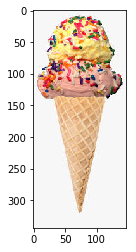

Cars = 3.1689434508526153%
Ice cream cone = 76.0794150014328%
Cricket ball = 20.751641547714577%
The predicted image is : Ice cream cone


C:\Users\lenovo\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [35]:
#Model Evaluation

url=input('Enter URL of Image :')
img=imread(url)

plt.imshow(img)
plt.show()

img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]

probability=model.predict_proba(l)

for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')

print("The predicted image is : "+Categories[model.predict(l)[0]])